# Portfolio Optimization

<p style="font-size:15px;">This model calculates the best way to allocate investments across the 11 assets I own as of November 25, 2024. These assets include:</p>

<span style="font-size: 15px;">

1. Gold

2. Money Market Fund: Mandiri Investa Pasar Uang Kelas A (MIPU-A)

3. Fixed Income Fund: Manulife Obligasi Nusantara II Kelas A (MONI II)

4. ITMG Stock

5. SMDR Stock

6. DMAS Stock

7. TUGU Stock

8. Bitcoin (BTC)

9. Ethereum (ETH)

10. S&P 500 ETF (SPY)

11. Nasdaq 100 ETF (QQQ)

Here’s why I chose to invest in these 11 assets:
1. Gold: A time-tested store of value and one of the most reliable hedges against inflation. It's a safe haven during periods of economic uncertainty.

2. Money Market Fund: A low-risk, liquid investment ideal for emergency funds, providing stable returns. I’ve chosen the Mandiri Investa Pasar Uang Kelas A because it has a solid track record and a large AUM, ensuring liquidity and stability.

3. Fixed Income Fund: A core investment for retirement planning, offering higher returns than money market funds with relatively stable income streams. I selected the Manulife Obligasi Nusantara Indonesia II Kelas A due to its strong performance and high AUM.

4. ITMG Stock: A coal mining company with robust cash flow and a consistent dividend history. The dividends from this stock are expected to contribute to passive income for my retirement.

5. SMDR Stock: A leader in the maritime transport sector. With the growing global demand for container shipping, this stock is positioned for strong growth in the future.

6. DMAS Stock: A company with significant cash reserves, currently trading below its 5-year average price-to-earnings ratio, making it an attractive value play.

7. TUGU Stock: A well-established insurance company that offered an impressive 10% dividend yield last year, which piqued my interest due to its potential for steady income.

8. Bitcoin: The largest and most recognized cryptocurrency, offering high growth potential and serving as a hedge against traditional market volatility.

9. Ethereum: The second-largest cryptocurrency by market cap, with unique use cases in smart contracts and decentralized applications, making it a promising long-term investment.

10. S&P 500 ETF: An exchange-traded fund that tracks the performance of the S&P 500 Index, providing exposure to a diversified basket of 500 leading US companies.

11. QQQ ETF: An ETF that tracks the Nasdaq-100 Index, focusing on tech-heavy companies and growth stocks, offering potential for high returns in a thriving technology sector.
</span>


# 1. Getting Data
 <span style="font-size: 18px;">I’ve gathered historical data for stocks, ETFs, cryptocurrencies, mutual funds, and gold from different platforms. To make the analysis easier, I’ve put all the data into one Excel file. The data includes weekly closing prices over the past 6 years</span>


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('historical px.xlsx')

df = df.iloc[::-1].reset_index(drop=True)

print(df.head()) 
print(df.tail())  

        Date    GOLD  MONI II   MIPU-A      ITMG   SMDR   DMAS     TUGU  \
0 2018-05-28  1294.8  2049.10  1360.70   9822.82  49.98  68.23  1185.97   
1 2018-06-04  1298.1  2068.34  1361.83  10269.74  49.44  67.78  1208.21   
2 2018-06-11  1274.6  2048.54  1362.16  10269.74  49.44  67.78  1208.21   
3 2018-06-18  1267.4  2048.54  1364.24   9005.05  45.95  61.54  1293.45   
4 2018-06-25  1251.3  2017.93  1364.82   8510.58  47.02  57.08  1323.10   

       BTC     ETH      SPY     QQQ  
0  7720.25  618.33  2721.33  162.16  
1  6786.02  526.48  2734.62  165.30  
2  6499.27  500.45  2779.03  166.93  
3  6173.23  457.67  2779.66  169.36  
4  6385.82  453.92  2754.88  167.77  
          Date    GOLD  MONI II   MIPU-A     ITMG   SMDR   DMAS    TUGU  \
335 2024-10-28  2738.6  2941.46  1722.61  25500.0  334.0  163.0  1130.0   
336 2024-11-01  2751.0  2945.34  1723.50  25500.0  326.0  162.0  1110.0   
337 2024-11-08  2687.5  2958.21  1724.98  25250.0  300.0  160.0  1090.0   
338 2024-11-15  2565.

# 2. Return 

In [135]:
columns = ['GOLD', 'MONI II', 'MIPU-A', 'ITMG', 'SMDR', 'DMAS', 'TUGU', 'BTC', 'ETH', 'SPY', 'QQQ']
returns = df[columns].pct_change()

df_returns = pd.concat([df, returns], axis=1)
print(df_returns.head())
print(df.tail())  

        Date    GOLD  MONI II   MIPU-A      ITMG   SMDR   DMAS     TUGU  \
0 2018-05-28  1294.8  2049.10  1360.70   9822.82  49.98  68.23  1185.97   
1 2018-06-04  1298.1  2068.34  1361.83  10269.74  49.44  67.78  1208.21   
2 2018-06-11  1274.6  2048.54  1362.16  10269.74  49.44  67.78  1208.21   
3 2018-06-18  1267.4  2048.54  1364.24   9005.05  45.95  61.54  1293.45   
4 2018-06-25  1251.3  2017.93  1364.82   8510.58  47.02  57.08  1323.10   

       BTC     ETH  ...   MONI II    MIPU-A      ITMG      SMDR      DMAS  \
0  7720.25  618.33  ...       NaN       NaN       NaN       NaN       NaN   
1  6786.02  526.48  ...  0.009389  0.000830  0.045498 -0.010804 -0.006595   
2  6499.27  500.45  ... -0.009573  0.000242  0.000000  0.000000  0.000000   
3  6173.23  457.67  ...  0.000000  0.001527 -0.123147 -0.070591 -0.092063   
4  6385.82  453.92  ... -0.014942  0.000425 -0.054910  0.023286 -0.072473   

       TUGU       BTC       ETH       SPY       QQQ  
0       NaN       NaN       NaN 

# 3. Mean and Variance 

In [136]:
columns = ['GOLD', 'MONI II', 'MIPU-A', 'ITMG', 'SMDR', 'DMAS', 'TUGU', 'BTC', 'ETH', 'SPY', 'QQQ']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# returns 
returns = df[columns].pct_change()

# mean and weekly standard dev
mean_weekly_return = returns.mean()
weekly_volatility = returns.std()


annualized_return = (1 + mean_weekly_return)**52 - 1  # Mengannualisasi return
annualized_volatility = weekly_volatility * np.sqrt(52)  # Mengannualisasi volatilitas

#expected returns and covariance 
expected_returns = (1 + returns.mean())**52 - 1  # Annualized return
covariance_matrix = returns.cov() * 52  # Annualized covariance

result_df = pd.DataFrame({
    'Annualized Return': annualized_return,
    'Annualized Volatility': annualized_volatility})

print("Annualized Return & Volatility:")
print(result_df)
print("\nCovariance Matrix (Annualized):")
print(covariance_matrix)


Annualized Return & Volatility:
         Annualized Return  Annualized Volatility
GOLD              0.130950               0.146733
MONI II           0.058315               0.055561
MIPU-A            0.037308               0.002047
ITMG              0.300268               0.455447
SMDR              0.490632               0.542151
DMAS              0.221967               0.379432
TUGU              0.068473               0.418788
BTC               0.811456               0.640444
ETH               0.836330               0.838678
SPY               0.148336               0.188350
QQQ               0.218672               0.218860

Covariance Matrix (Annualized):
             GOLD   MONI II    MIPU-A      ITMG      SMDR      DMAS      TUGU  \
GOLD     0.021531 -0.000939  0.000019  0.002743  0.008208  0.001525 -0.004072   
MONI II -0.000939  0.003087  0.000017 -0.000236  0.001698  0.002727  0.000109   
MIPU-A   0.000019  0.000017  0.000004 -0.000137 -0.000123  0.000051 -0.000046   
ITMG     0.

# 4.  Distribution of Returns Visualization

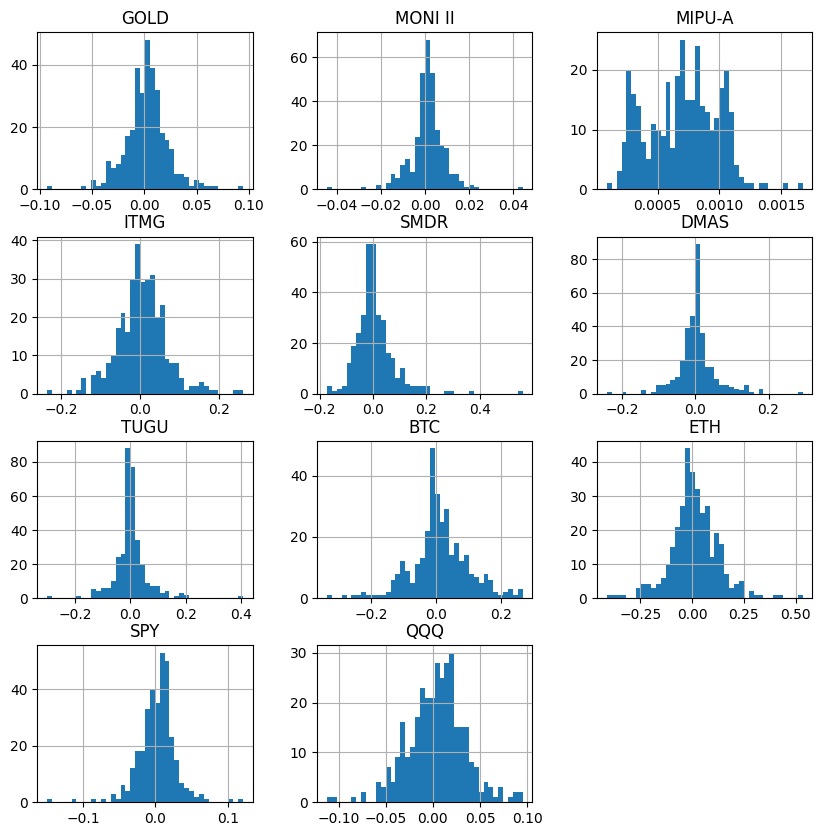

In [137]:
returns.hist(figsize=(10,10),bins=40)
plt.show()


<h3 style="font-size:18px;">Distribution Center:</h3>
<p style="font-size:15px;"> Positive vs Negative Returns: If most of the data is on the right side (positive) of the X-axis, this indicates that there are many periods with positive returns. On the other hand, if most of the data is on the left side, the asset is likely to experience losses more often. </p>
<h3 style="font-size:18px;">Volatility:</h3>
<p style="font-size:15px;"> If the histogram appears to be widely spread out (with many "gaps" between bars), it suggests higher volatility (more fluctuating returns). On the flip side, if the distribution is tighter, it means the returns are more stable and less prone to large swings. </p>
<h3 style="font-size:18px;">Return Frequency:</h3>
<p style="font-size:15px;"> If most of the data clusters around a specific return value or a narrow range, it shows that the asset's returns are quite consistent and tend to hover around that value. </p>

# 5. Price and Return Chart 



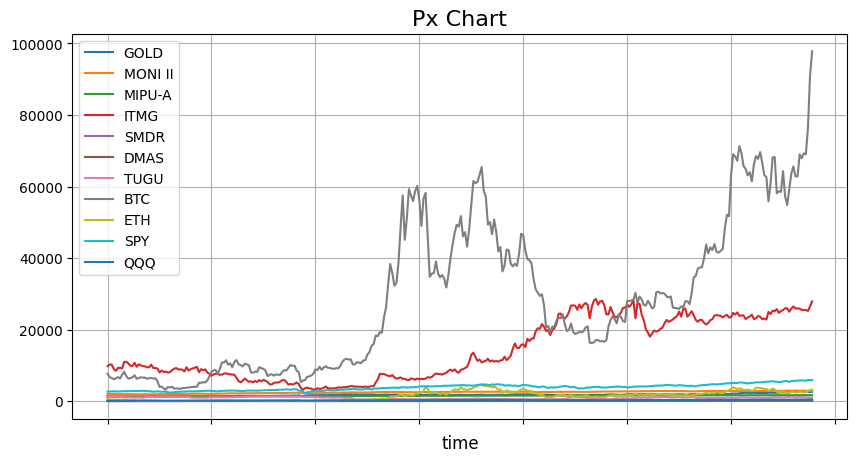

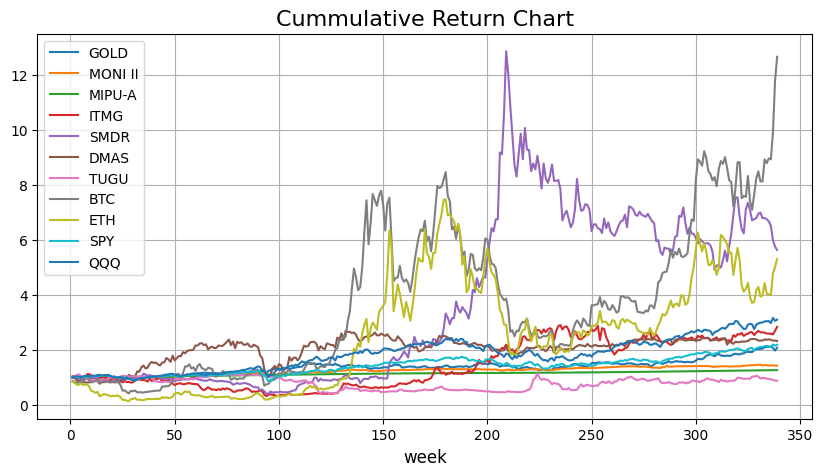

In [143]:
assets = ['GOLD', 'MONI II', 'MIPU-A', 'ITMG', 'SMDR', 'DMAS', 'TUGU', 'BTC', 'ETH', 'SPY', 'QQQ']

plt.figure(figsize=(10, 5))
for asset in assets:
    plt.plot(df.index, df[asset], label=asset)  

plt.title('Px Chart', fontsize=16)
plt.xlabel('time', fontsize=12)
plt.ylabel( '', fontsize=12)

plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.gca().set_xticklabels([])
plt.show()

#buat grafik relatif
plt.figure(figsize=(10, 5))
for asset in assets:
    plt.plot(df.index, cumulative_returns[asset], label=asset)  

plt.title('Cummulative Return Chart', fontsize=16)
plt.xlabel('week', fontsize=12)
plt.ylabel('', fontsize=12)

plt.grid(True)
plt.legend()
plt.show()


# 6. Weekly Price Chart and Return Graph


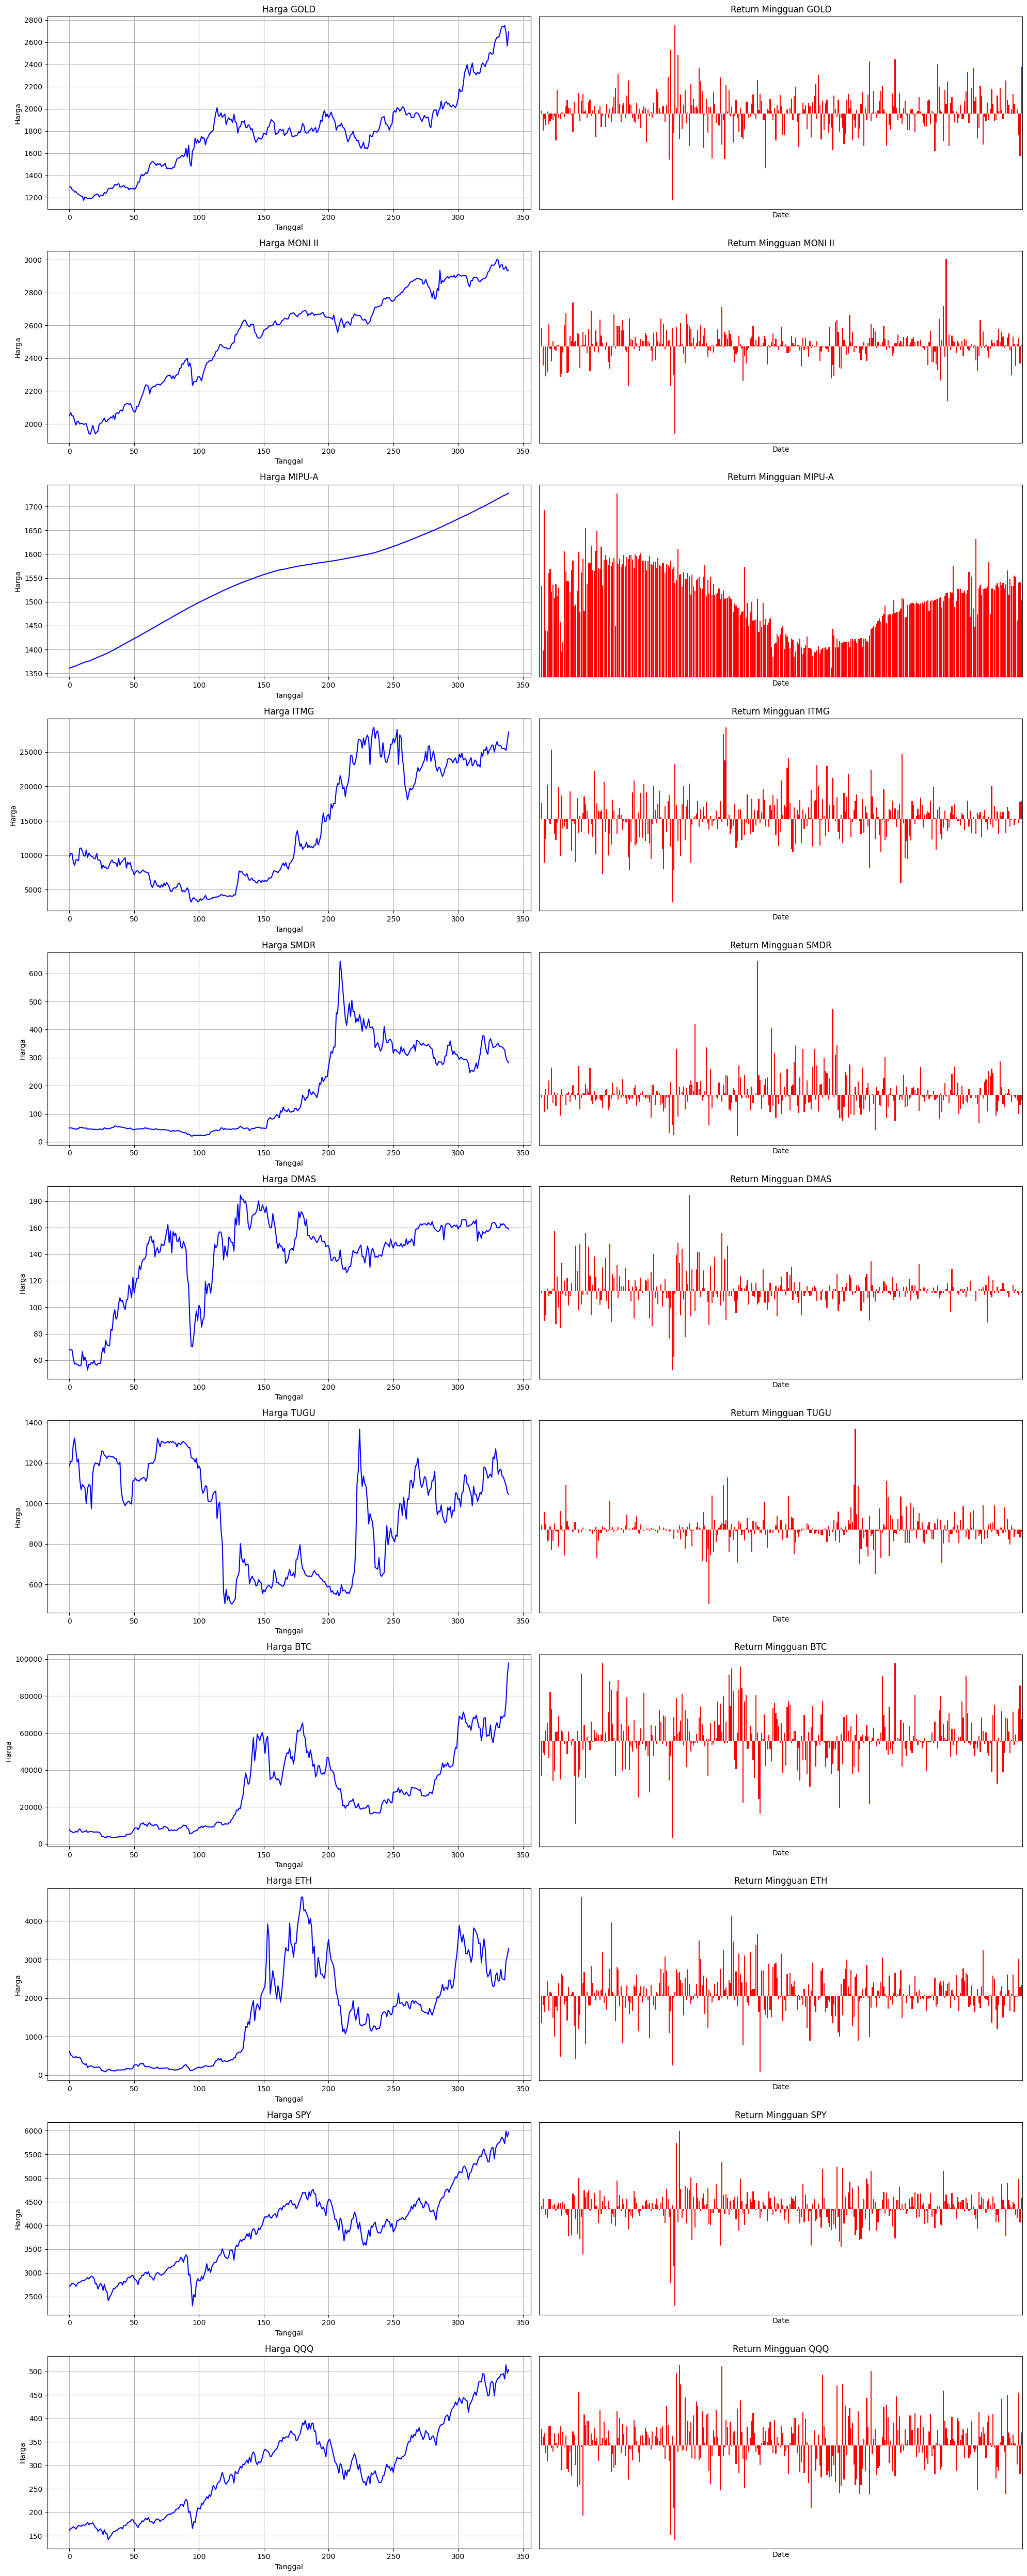

In [142]:
assets = ['GOLD', 'MONI II', 'MIPU-A', 'ITMG', 'SMDR', 'DMAS', 'TUGU', 'BTC', 'ETH', 'SPY', 'QQQ']
plt.figure(figsize=(20, 50))  

for i, asset in enumerate(assets, 1):
    plt.subplot(len(assets), 2, 2*i-1)
    plt.plot(df[asset], label=f'Harga {asset}', color='blue')
    plt.title(f'Harga {asset}')
    plt.xlabel('Tanggal')
    plt.ylabel('Harga')
    plt.grid(True)

    plt.subplot(len(assets), 2, 2*i)
    returns[asset].plot(kind='bar', color='red', width=0.8)  
    plt.title(f'Return Mingguan {asset}')
    
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)  
    plt.gca().spines['top'].set_visible(True)  
    plt.gca().spines['right'].set_visible(True) 
    plt.gca().spines['left'].set_visible(True)  
    plt.gca().spines['bottom'].set_visible(True)  


plt.tight_layout()
plt.show()

# 7. MVO with Montecarlo Simulation


<span style="font-size:18px;">This tool is used to analyze the combination of 11 assets in the portfolio, evaluate risk, and identify the optimal strategy. By running 10,000 simulations (you can simulate more or fewer if you prefer, but I think 10,000 should be enough), we can get a better picture of the potential outcomes and associated risks of the portfolio.</span>

<span style="font-size:18px;">With a risk-free rate of 6.64% (return on ORI026-T6), which is the yield on retail government bonds.</span>

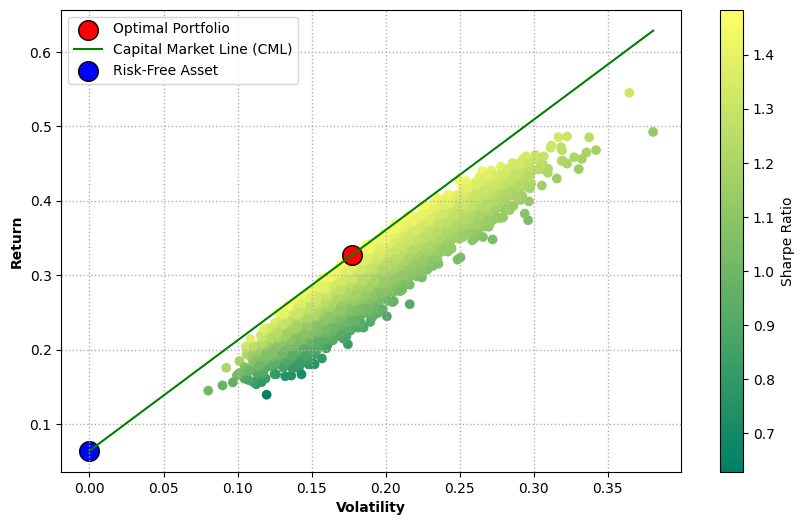

In [144]:
rf = 0.064

def ret_vol_sr(weights, expected_returns, covariance_matrix, rf):
    ret = np.sum(expected_returns.values * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix.values, weights)))
    sr = (ret - rf) / vol
    return np.array([ret, vol, sr])

num_ports = 10000 #10.000 simulasi coy
num_assets = 11

all_weights = np.zeros((num_ports, num_assets))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharp_arr = np.zeros(num_ports)

for i in range(num_ports):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    all_weights[i, :] = weights
    ret_arr[i] = np.sum(expected_returns.values * weights)
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix.values, weights)))
    sharp_arr[i] = (ret_arr[i] - rf) / vol_arr[i]

# portofolio with max Sharpe ratio 
max_sr_idx = sharp_arr.argmax()
max_sr = sharp_arr[max_sr_idx]
optimal_weights = all_weights[max_sr_idx]
optimal_return = ret_arr[max_sr_idx]
optimal_volatility = vol_arr[max_sr_idx]

# CML (Capital Market Line) - hubungkan titik optimal dengan titik bebas risiko ORI026 
# hitung CML
x_cml = np.linspace(0, max(vol_arr), 100)
y_cml = rf + (max_sr * x_cml)

plt.figure(figsize=(10, 6))
plt.scatter(vol_arr, ret_arr, c=sharp_arr, cmap='summer')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontweight='bold')
plt.ylabel('Return', fontweight='bold')

plt.scatter(optimal_volatility, optimal_return, c='red', s=200, edgecolors='black', marker='o', label='Optimal Portfolio')

# Menambahkan CML
plt.plot(x_cml, y_cml, color='green', label='Capital Market Line (CML)')

# Menambahkan titik bebas risiko
plt.scatter(0, rf, color='blue', s=200, edgecolors='black', marker='o', label='Risk-Free Asset')

plt.legend()
plt.grid(True, ls=':', lw=1)
plt.show()


# 8. Comparison of Optimal, Highest Risk, Lowest Risk Portfolio

Comparison of Portfolio Allocations:
         Optimal Portfolio  Lowest Risk Portfolio  Highest Risk Portfolio
Assets                                                                   
GOLD              0.176862               0.205004                0.012940
MONI II           0.012735               0.134484                0.107668
MIPU-A            0.079840               0.232579                0.133153
ITMG              0.083485               0.021519                0.047346
SMDR              0.135090               0.016664                0.026488
DMAS              0.054011               0.079895                0.096627
TUGU              0.024369               0.051220                0.023217
BTC               0.171332               0.026141                0.205941
ETH               0.014761               0.007184                0.304009
SPY               0.144220               0.156212                0.020116
QQQ               0.103295               0.069098                0.022496



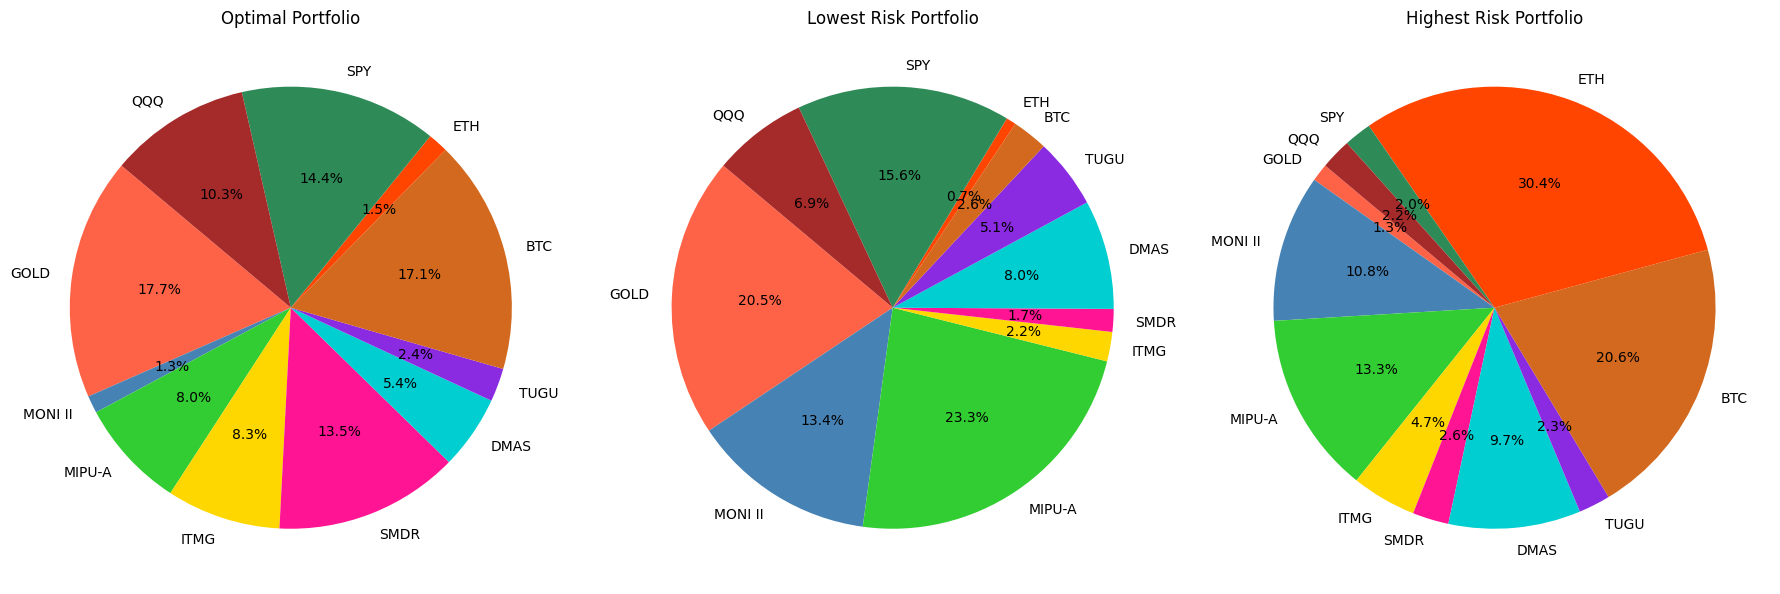

In [ ]:
# Define a set of contrasting colors
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF1493', '#00CED1', '#8A2BE2', '#D2691E', '#FF4500', '#2E8B57', '#A52A2A']

# Portfolio with lowest risk
min_vol_idx = vol_arr.argmin()
min_vol_weights = all_weights[min_vol_idx]
min_vol_return = ret_arr[min_vol_idx]
min_vol_volatility = vol_arr[min_vol_idx]

# Portfolio with highest risk
max_vol_idx = vol_arr.argmax()
max_vol_weights = all_weights[max_vol_idx]
max_vol_return = ret_arr[max_vol_idx]
max_vol_volatility = vol_arr[max_vol_idx]

# Comparison DataFrame for asset allocation
comparison_df = pd.DataFrame({
    "Assets": returns.columns,
    "Optimal Portfolio": optimal_weights,
    "Lowest Risk Portfolio": min_vol_weights,
    "Highest Risk Portfolio": max_vol_weights,
}).set_index("Assets")

# Metrics DataFrame
metrics_df = pd.DataFrame({
    "Metrics": ["Return", "Volatility", "Sharpe Ratio"],
    "Optimal Portfolio": [optimal_return, optimal_volatility, max_sr],
    "Lowest Risk Portfolio": [min_vol_return, min_vol_volatility, (min_vol_return - rf) / min_vol_volatility],
    "Highest Risk Portfolio": [max_vol_return, max_vol_volatility, (max_vol_return - rf) / max_vol_volatility]
}).set_index("Metrics")

print("Comparison of Portfolio Allocations:")
print(comparison_df)
print("\nKey Metrics for Each Portfolio:")
print(metrics_df)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Optimal Portfolio
axs[0].pie(optimal_weights, labels=returns.columns, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Optimal Portfolio')

# Lowest Risk Portfolio
axs[1].pie(min_vol_weights, labels=returns.columns, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Lowest Risk Portfolio')

# Highest Risk Portfolio
axs[2].pie(max_vol_weights, labels=returns.columns, autopct='%1.1f%%', startangle=140, colors=colors)
axs[2].set_title('Highest Risk Portfolio')

plt.tight_layout()
plt.show()

# 9. Current Portfolio Allocation (02 - Jan 2025)

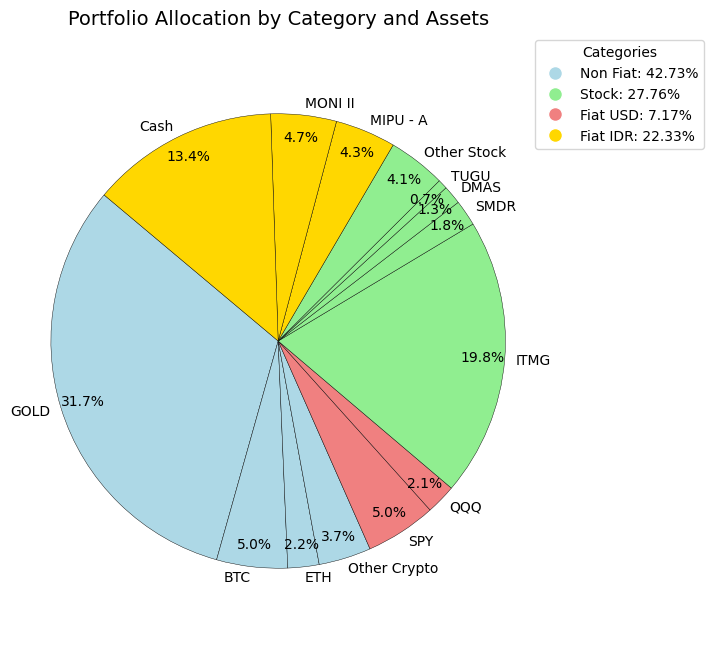

In [146]:
labels = ['GOLD', 'BTC', 'ETH', 'Other Crypto', 'SPY', 'QQQ', 'ITMG', 'SMDR', 'DMAS', 'TUGU', 'Other Stock', 'MIPU - A', 'MONI II', 'Cash']
sizes = [31.74, 5.04, 2.22, 3.73, 5.03, 2.14, 19.81, 1.84, 1.33, 0.68, 4.10, 4.31, 4.66, 13.36]

categories = {
    'Non Fiat': ['GOLD', 'BTC', 'ETH', 'Other Crypto'],
    'Stock': ['ITMG', 'SMDR', 'DMAS', 'TUGU', 'Other Stock'],
    'Fiat USD': ['SPY', 'QQQ'],
    'Fiat IDR': ['MIPU - A', 'MONI II', 'Cash']
}
category_colors = {
    'Non Fiat': 'lightblue',
    'Stock': 'lightgreen',
    'Fiat USD': 'lightcoral',
    'Fiat IDR': 'gold'
}
colors = []
for asset in labels:
    for category, assets in categories.items():
        if asset in assets:
            colors.append(category_colors[category])
category_percentages = {}
total_size = sum(sizes)
for category, assets in categories.items():
    category_percentages[category] = sum(sizes[labels.index(asset)] for asset in assets) / total_size * 100


fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 0.3},
       labeldistance=1.05, pctdistance=0.9)  

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in category_colors.values()]
legend_labels = [f"{category}: {category_percentages[category]:.2f}%" for category in categories.keys()]
ax.legend(handles=handles, labels=legend_labels, title='Categories', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))

plt.title('Portfolio Allocation by Category and Assets', fontsize=14)
plt.subplots_adjust(right=0.75)  
plt.axis('equal')
plt.show()


follow my Instagram : @azizgojiz

